# 1.时间序列模分析概述


时间序列是按照时间次序排列的随机变量序列，如：每日股票收盘价，每隔15min的风力发电量、每年的GDP等等。 从商业经济、管理或者工程科技，时间序列分析都占据着十分重要的作用，应用范围十分广泛。 下面，我们先通过几个案例学习时间序列分析的几个目标：

**（1）描述：** （以下例子参考于何书元老师的《应用时间序列分析》第一章 例1.2）

下面一份数据列出了某城市1991年至1996年中每个季度的民用煤消耗量（单位：吨），我们需要对民用煤消耗量进行合理的描述性分析。

In [4]:
# 引入相关工具包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
# plt.rcParams['font.sans-serif'] = ["SimHei"]  # 绘图显示中文
# plt.rcParams["axes.unicode_minus"] = False

In [5]:
# 读取数据并进行初步展示
time_index_list = ['1991Q1','1991Q2','1991Q3','1991Q4',
                   '1992Q1','1992Q2','1992Q3','1992Q4',
                   '1993Q1','1993Q2','1993Q3','1993Q4',
                   '1994Q1','1994Q2','1994Q3','1994Q4',
                   '1995Q1','1995Q2','1995Q3','1995Q4',
                   '1996Q1','1996Q2','1996Q3','1996Q4']
QTY_list = [6878.4,5343.7,4847.9,6421.9,
            6815.4,5532.6,4745.6,6406.2,
            6634.4,5658.5,4674.8,6645.5,
            7130.2,5532.6,4989.6,6642.3,
            7413.5,5863.1,4997.4,6776.1,
            7476.5,5965.5,5202.1,6894.1]
data = pd.DataFrame({'Year':time_index_list,
                     'QTY':QTY_list})
data.head()

,Year,QTY
0,1991Q1,6878.4
1,1991Q2,5343.7
2,1991Q3,4847.9
3,1991Q4,6421.9
4,1992Q1,6815.4


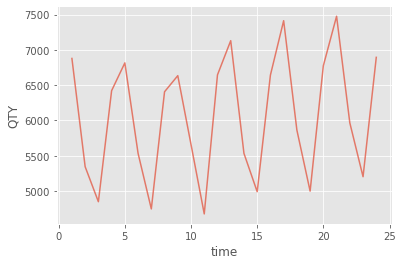

In [6]:
# 对民用煤消耗量做可视化展示：
plt.plot(np.arange(24)+1, data['QTY'],alpha=0.7)
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

从图中可以清晰看到，数据有强烈的周期信息，周期是4且民用煤消耗量呈现略微逐年增加的趋势。为了验证时间序列是否具有趋势信息和周期信息，我们需要对时间序列进行分解。在分解之前，我们先来学习时间序列的几个重要术语：

**时间序列**：按照时间次序排列的随机变量序列$X_1,X_2,...$称为时间序列。因此，时间序列中每一个时刻都是一个随机变量，而我们观察到的数值就是时间序列在某个时刻的观测值，用$x_1,x_2,...,x_N$表示。如：

|  序号    |  $\{X_t\}$        | $\{x_t\}$    |QTY     |
|  ----    | ----              |----          |  ----  |
| 0        | $X_0 $~ N(10,0.1) | $x_0$        | 11     |
| 1        | $X_1 $~ N(10,0.1) | $x_1$        | 9      |
| 2        | $X_2 $~ N(10,0.1) | $x_2$        | 10     |
| 3        | $X_3 $~ N(10,0.1) | $x_3$        | 12      |
| 4        | $X_4 $~ N(10,0.1) | $x_4$        | 11     |
| 5        | $X_5 $~ N(10,0.1) | $x_5$        | 9      |


**时间序列的分解**：大量的时间序列的观测样本都表现出趋势性、季节性和随机性，因此可以把时间序列分解为三个部分的叠加：
$$
X_t = T_t + S_t + R_t, t = 1,2,......   
$$

其中，$\{T_t\}$是趋势项（Trend），$\{S_t\}$是季节项（Seasonal），$\{R_t\}$是随机项（Trend）。